<a href="https://colab.research.google.com/github/dayeong089/web_scrapping/blob/main/Week4_Text_Data_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Software Coaching for Python
# Week 4: Text Data Processing

Instructor: Kang-Pyo Lee

In [ ]:
from google.colab import drive

drive.mount('/content/drive')
path = "/content/drive/My Drive/PythonCoaching"
my_folder = "dayoung21"     # *** REPLACE WITH YOUR FOLDER NAME ***
outcome_folder = f"{path}/{my_folder}/outcome"
classdata_folder = f"{path}/classdata"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Install packages

In [ ]:
! pip install --user nltk textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Basic NLP Techniques Using NLTK

In [ ]:
text = "Some people did not think it was possible to produce a #COVID19 vaccine so quickly, but it was. Now some people say that vaccinating the world is not possible. They’re wrong. As Nelson Mandela, Madiba, said; it always seems impossible until it’s done."
text

'Some people did not think it was possible to produce a #COVID19 vaccine so quickly, but it was. Now some people say that vaccinating the world is not possible. They’re wrong. As Nelson Mandela, Madiba, said; it always seems impossible until it’s done.'

Suppose you would like to identify sentences in a string.

In [ ]:
text.split(".")

['Some people did not think it was possible to produce a #COVID19 vaccine so quickly, but it was',
 ' Now some people say that vaccinating the world is not possible',
 ' They’re wrong',
 ' As Nelson Mandela, Madiba, said; it always seems impossible until it’s done',
 '']

Two problems with simply splitting a sentence with a period:
- A sentence does not always end with a period. For example, it can also end with a question mark or an exclamation mark.
- A period does not always mean completeness of a sentence, for emample, Ms., Dr., 3.14, etc.

Now suppose you would also like to identify words in a string.

In [ ]:
text.split(" ")     # 'was.', 'possible.', 'wrong.', 'said;', 'done.'

['Some',
 'people',
 'did',
 'not',
 'think',
 'it',
 'was',
 'possible',
 'to',
 'produce',
 'a',
 '#COVID19',
 'vaccine',
 'so',
 'quickly,',
 'but',
 'it',
 'was.',
 'Now',
 'some',
 'people',
 'say',
 'that',
 'vaccinating',
 'the',
 'world',
 'is',
 'not',
 'possible.',
 'They’re',
 'wrong.',
 'As',
 'Nelson',
 'Mandela,',
 'Madiba,',
 'said;',
 'it',
 'always',
 'seems',
 'impossible',
 'until',
 'it’s',
 'done.']

Splitting text with a space works generally fine except that it cannot handle punctuation characters such as comma, period, and 's.

### Sentence Tokenization

In [ ]:
import nltk

nltk.download(['punkt', 'averaged_perceptron_tagger', 'stopwords'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Natural Language Toolkit (NLTK): https://www.nltk.org/

In [ ]:
sents = nltk.sent_tokenize(text)       # Tokenize text into sentences
sents

['Some people did not think it was possible to produce a #COVID19 vaccine so quickly, but it was.',
 'Now some people say that vaccinating the world is not possible.',
 'They’re wrong.',
 'As Nelson Mandela, Madiba, said; it always seems impossible until it’s done.']

In [ ]:
len(sents)

4

### Word Tokenization

In [ ]:
words = nltk.word_tokenize(text)        # Tokenize text into words
words

['Some',
 'people',
 'did',
 'not',
 'think',
 'it',
 'was',
 'possible',
 'to',
 'produce',
 'a',
 '#',
 'COVID19',
 'vaccine',
 'so',
 'quickly',
 ',',
 'but',
 'it',
 'was',
 '.',
 'Now',
 'some',
 'people',
 'say',
 'that',
 'vaccinating',
 'the',
 'world',
 'is',
 'not',
 'possible',
 '.',
 'They',
 '’',
 're',
 'wrong',
 '.',
 'As',
 'Nelson',
 'Mandela',
 ',',
 'Madiba',
 ',',
 'said',
 ';',
 'it',
 'always',
 'seems',
 'impossible',
 'until',
 'it',
 '’',
 's',
 'done',
 '.']

Note that each punctuation character is also treated as a token.

In [ ]:
len(words)

56

### Part-of-Speech (PoS) Tagging - 형태소 분석

Part-of-speech tagging is the process of marking up a word in a text (corpus) as corresponding to a particular part of speech. A simplified form of this is commonly taught to school-age children, in the identification of words as nouns, verbs, adjectives, adverbs, etc.

Part-of-speech tagging on Wikipedia: https://en.wikipedia.org/wiki/Part-of-speech_tagging

In [ ]:
tagged_words = nltk.pos_tag(words)          # Tag each word with their part-of-speech tag .. tokenize된 word리스트를 보내야함
tagged_words

[('Some', 'DT'),
 ('people', 'NNS'),
 ('did', 'VBD'),
 ('not', 'RB'),
 ('think', 'VB'),
 ('it', 'PRP'),
 ('was', 'VBD'),
 ('possible', 'JJ'),
 ('to', 'TO'),
 ('produce', 'VB'),
 ('a', 'DT'),
 ('#', '#'),
 ('COVID19', 'NNP'),
 ('vaccine', 'NN'),
 ('so', 'RB'),
 ('quickly', 'RB'),
 (',', ','),
 ('but', 'CC'),
 ('it', 'PRP'),
 ('was', 'VBD'),
 ('.', '.'),
 ('Now', 'RB'),
 ('some', 'DT'),
 ('people', 'NNS'),
 ('say', 'VBP'),
 ('that', 'IN'),
 ('vaccinating', 'VBG'),
 ('the', 'DT'),
 ('world', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('possible', 'JJ'),
 ('.', '.'),
 ('They', 'PRP'),
 ('’', 'VBP'),
 ('re', 'JJ'),
 ('wrong', 'JJ'),
 ('.', '.'),
 ('As', 'IN'),
 ('Nelson', 'NNP'),
 ('Mandela', 'NNP'),
 (',', ','),
 ('Madiba', 'NNP'),
 (',', ','),
 ('said', 'VBD'),
 (';', ':'),
 ('it', 'PRP'),
 ('always', 'RB'),
 ('seems', 'VBZ'),
 ('impossible', 'JJ'),
 ('until', 'IN'),
 ('it', 'PRP'),
 ('’', 'VBZ'),
 ('s', 'JJ'),
 ('done', 'VBN'),
 ('.', '.')]

Note that the argument of <b>pos_tag</b> function is a list of words, not raw text.

Penn Part of Speech Tags: https://cs.nyu.edu/grishman/jet/guide/PennPOS.html

In [ ]:
[word for word, tag in tagged_words if tag in ["NN", "NNS"]]   # Noun, singular or mass; Noun, plural

['people', 'vaccine', 'people', 'world']

In [ ]:
[word for word, tag in tagged_words if tag in ["NNP", "NNPS"]]  # Proper noun, singular; Proper noun, plural

['COVID19', 'Nelson', 'Mandela', 'Madiba']

In [ ]:
[word for word, tag in tagged_words if tag.startswith("NN")] # 모든 명사 집합

['people',
 'COVID19',
 'vaccine',
 'people',
 'world',
 'Nelson',
 'Mandela',
 'Madiba']

In [ ]:
[word for word, tag in tagged_words if tag.startswith("JJ")] # 모든 형용사 집합

['possible', 'possible', 're', 'wrong', 'impossible', 's']

In [ ]:
[word for word, tag in tagged_words if tag.startswith("VB")] # 모든 동사 집합

['did',
 'think',
 'was',
 'produce',
 'was',
 'say',
 'vaccinating',
 'is',
 '’',
 'said',
 'seems',
 '’',
 'done']

### Stemming .. 뿌리를 찾는것

Stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form.

A computer program or subroutine that stems word may be called a stemming program, stemming algorithm, or stemmer.

Stemming on Wikipedia: https://en.wikipedia.org/wiki/Stemming

In [ ]:
stemmer = nltk.stem.SnowballStemmer("english")

In [ ]:
stemmer.stem("car")

'car'

In [ ]:
stemmer.stem("cars")

'car'

In [ ]:
stemmer.stem("say")

'say'

In [ ]:
stemmer.stem("saying")

'say'

In [ ]:
stemmer.stem("said")

'said'

In [ ]:
[(word, stemmer.stem(word)) for word in words]

[('Some', 'some'),
 ('people', 'peopl'),
 ('did', 'did'),
 ('not', 'not'),
 ('think', 'think'),
 ('it', 'it'),
 ('was', 'was'),
 ('possible', 'possibl'),
 ('to', 'to'),
 ('produce', 'produc'),
 ('a', 'a'),
 ('#', '#'),
 ('COVID19', 'covid19'),
 ('vaccine', 'vaccin'),
 ('so', 'so'),
 ('quickly', 'quick'),
 (',', ','),
 ('but', 'but'),
 ('it', 'it'),
 ('was', 'was'),
 ('.', '.'),
 ('Now', 'now'),
 ('some', 'some'),
 ('people', 'peopl'),
 ('say', 'say'),
 ('that', 'that'),
 ('vaccinating', 'vaccin'),
 ('the', 'the'),
 ('world', 'world'),
 ('is', 'is'),
 ('not', 'not'),
 ('possible', 'possibl'),
 ('.', '.'),
 ('They', 'they'),
 ('’', '’'),
 ('re', 're'),
 ('wrong', 'wrong'),
 ('.', '.'),
 ('As', 'as'),
 ('Nelson', 'nelson'),
 ('Mandela', 'mandela'),
 (',', ','),
 ('Madiba', 'madiba'),
 (',', ','),
 ('said', 'said'),
 (';', ';'),
 ('it', 'it'),
 ('always', 'alway'),
 ('seems', 'seem'),
 ('impossible', 'imposs'),
 ('until', 'until'),
 ('it', 'it'),
 ('’', '’'),
 ('s', 's'),
 ('done', 'done')

### N-grams

An n-gram is a contiguous sequence of n items from a given sample of text or speech. The items can be phonemes, syllables, letters, words or base pairs according to the application.

Using Latin numerical prefixes, an n-gram of size 1 is referred to as a "unigram"; size 2 is a "bigram"; size 3 is a "trigram".

N-gram on Wikipedia: https://en.wikipedia.org/wiki/N-gram

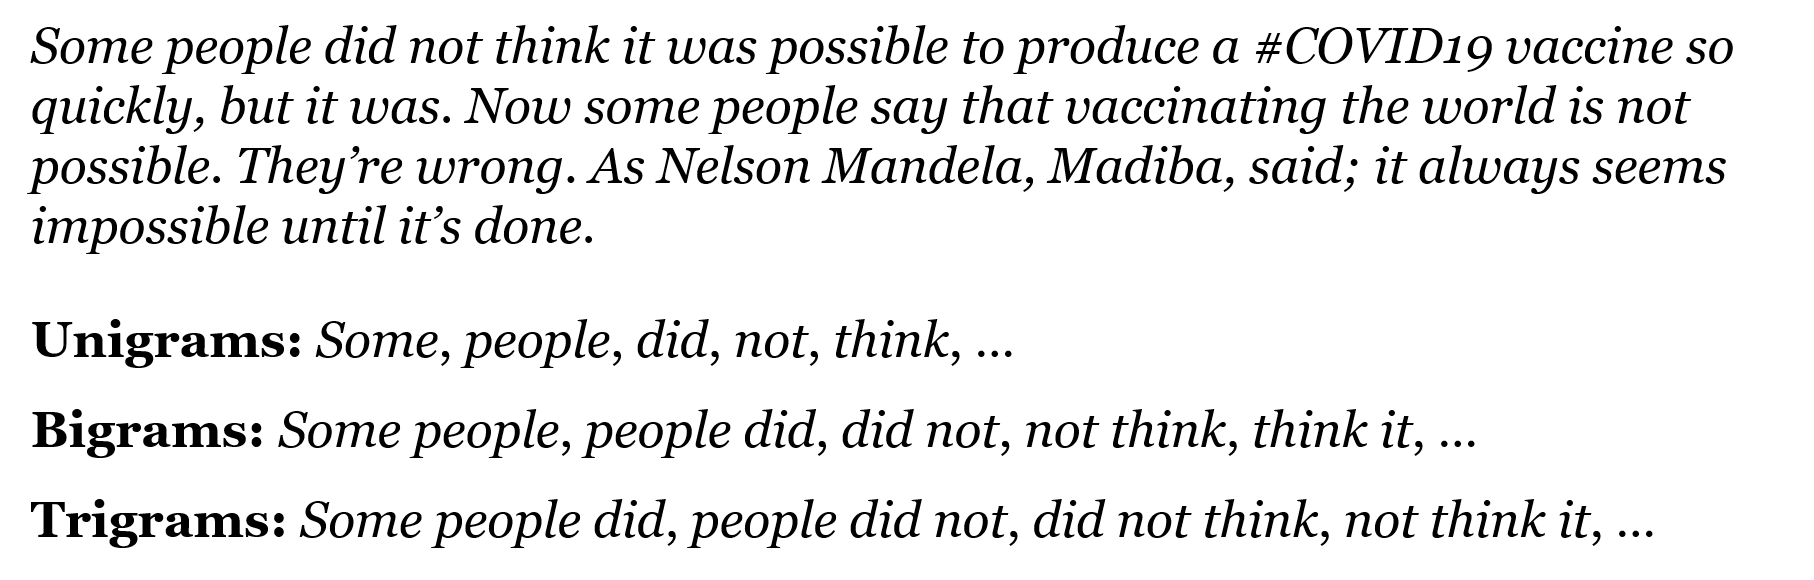

In [ ]:
from IPython.display import Image
Image(f"{classdata_folder}/images/ngram.png")

N-gram models are known to be effective in capturing phrases of multiple words.

In [ ]:
from nltk.util import ngrams

In [ ]:
ngrams(words, 1)

In [ ]:
list(ngrams(words, 1))

[('Some',),
 ('people',),
 ('did',),
 ('not',),
 ('think',),
 ('it',),
 ('was',),
 ('possible',),
 ('to',),
 ('produce',),
 ('a',),
 ('#',),
 ('COVID19',),
 ('vaccine',),
 ('so',),
 ('quickly',),
 (',',),
 ('but',),
 ('it',),
 ('was',),
 ('.',),
 ('Now',),
 ('some',),
 ('people',),
 ('say',),
 ('that',),
 ('vaccinating',),
 ('the',),
 ('world',),
 ('is',),
 ('not',),
 ('possible',),
 ('.',),
 ('They',),
 ('’',),
 ('re',),
 ('wrong',),
 ('.',),
 ('As',),
 ('Nelson',),
 ('Mandela',),
 (',',),
 ('Madiba',),
 (',',),
 ('said',),
 (';',),
 ('it',),
 ('always',),
 ('seems',),
 ('impossible',),
 ('until',),
 ('it',),
 ('’',),
 ('s',),
 ('done',),
 ('.',)]

Unigrams are practically the same as word tokens.

In [ ]:
list(ngrams(words, 2))

[('Some', 'people'),
 ('people', 'did'),
 ('did', 'not'),
 ('not', 'think'),
 ('think', 'it'),
 ('it', 'was'),
 ('was', 'possible'),
 ('possible', 'to'),
 ('to', 'produce'),
 ('produce', 'a'),
 ('a', '#'),
 ('#', 'COVID19'),
 ('COVID19', 'vaccine'),
 ('vaccine', 'so'),
 ('so', 'quickly'),
 ('quickly', ','),
 (',', 'but'),
 ('but', 'it'),
 ('it', 'was'),
 ('was', '.'),
 ('.', 'Now'),
 ('Now', 'some'),
 ('some', 'people'),
 ('people', 'say'),
 ('say', 'that'),
 ('that', 'vaccinating'),
 ('vaccinating', 'the'),
 ('the', 'world'),
 ('world', 'is'),
 ('is', 'not'),
 ('not', 'possible'),
 ('possible', '.'),
 ('.', 'They'),
 ('They', '’'),
 ('’', 're'),
 ('re', 'wrong'),
 ('wrong', '.'),
 ('.', 'As'),
 ('As', 'Nelson'),
 ('Nelson', 'Mandela'),
 ('Mandela', ','),
 (',', 'Madiba'),
 ('Madiba', ','),
 (',', 'said'),
 ('said', ';'),
 (';', 'it'),
 ('it', 'always'),
 ('always', 'seems'),
 ('seems', 'impossible'),
 ('impossible', 'until'),
 ('until', 'it'),
 ('it', '’'),
 ('’', 's'),
 ('s', 'done')

In [ ]:
[" ".join(gram) for gram in ngrams(words, 2)] # nelson mandela처럼 의미있는 phrase를 찾기 위해서

['Some people',
 'people did',
 'did not',
 'not think',
 'think it',
 'it was',
 'was possible',
 'possible to',
 'to produce',
 'produce a',
 'a #',
 '# COVID19',
 'COVID19 vaccine',
 'vaccine so',
 'so quickly',
 'quickly ,',
 ', but',
 'but it',
 'it was',
 'was .',
 '. Now',
 'Now some',
 'some people',
 'people say',
 'say that',
 'that vaccinating',
 'vaccinating the',
 'the world',
 'world is',
 'is not',
 'not possible',
 'possible .',
 '. They',
 'They ’',
 '’ re',
 're wrong',
 'wrong .',
 '. As',
 'As Nelson',
 'Nelson Mandela',
 'Mandela ,',
 ', Madiba',
 'Madiba ,',
 ', said',
 'said ;',
 '; it',
 'it always',
 'always seems',
 'seems impossible',
 'impossible until',
 'until it',
 'it ’',
 '’ s',
 's done',
 'done .']

In [ ]:
[" ".join(gram) for gram in ngrams(words, 3)] # 노이즈가 많음 .. 원하는 결과가 아닌 값들이 너무 많음

['Some people did',
 'people did not',
 'did not think',
 'not think it',
 'think it was',
 'it was possible',
 'was possible to',
 'possible to produce',
 'to produce a',
 'produce a #',
 'a # COVID19',
 '# COVID19 vaccine',
 'COVID19 vaccine so',
 'vaccine so quickly',
 'so quickly ,',
 'quickly , but',
 ', but it',
 'but it was',
 'it was .',
 'was . Now',
 '. Now some',
 'Now some people',
 'some people say',
 'people say that',
 'say that vaccinating',
 'that vaccinating the',
 'vaccinating the world',
 'the world is',
 'world is not',
 'is not possible',
 'not possible .',
 'possible . They',
 '. They ’',
 'They ’ re',
 '’ re wrong',
 're wrong .',
 'wrong . As',
 '. As Nelson',
 'As Nelson Mandela',
 'Nelson Mandela ,',
 'Mandela , Madiba',
 ', Madiba ,',
 'Madiba , said',
 ', said ;',
 'said ; it',
 '; it always',
 'it always seems',
 'always seems impossible',
 'seems impossible until',
 'impossible until it',
 'until it ’',
 'it ’ s',
 '’ s done',
 's done .']

Note that while n-grams are able to capture meaningful phrases in text, they may generate much noise.

## NLP Techniques Using TextBlob - 감정분석 .. 기업/정책 등에 대한 사람의 반응을 분석하기 위해(특히 긍정, 부정 두가지 반응이 혼재되어 있는 경우/이중부정(하지 않은건 아니야)/반어법)

TextBlob: https://textblob.readthedocs.io/

In [ ]:
from textblob import TextBlob

### Sentiment Analysis

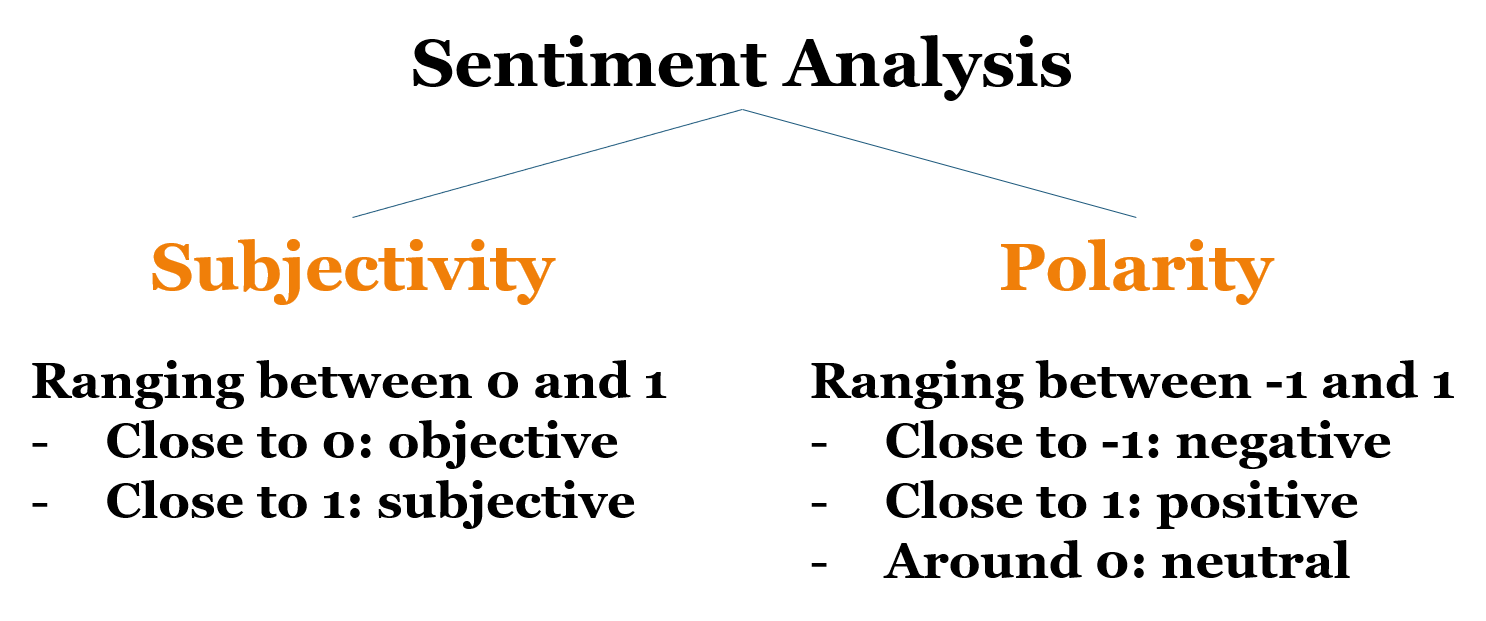

In [ ]:
Image(f"{classdata_folder}/images/sentiment_analysis.png") # polarity : 많은 경우에 점수를 줌 (긍정, 부정 정해서 주지 않고)

In [ ]:
text = "It's just awesome!"

In [ ]:
tb = TextBlob(text)

In [ ]:
tb.sentiment # named tuple

Sentiment(polarity=1.0, subjectivity=1.0)

In [ ]:
tb.sentiment.polarity

1.0

In [ ]:
tb.sentiment.subjectivity

1.0

In [ ]:
text = "It's Friday."

In [ ]:
tb = TextBlob(text)
tb.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [ ]:
text = "I don't like it"
tb = TextBlob(text)
tb.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

## Loading Data

In [ ]:
# urls = ["https://fivethirtyeight.com/features/"]

# for i in range(2, 151):
#     url = f"https://fivethirtyeight.com/features/page/{i}/"
#     urls.append(url)

# import requests
# from bs4 import BeautifulSoup
# import time

# for url in urls:
#     print(url)

#     ####################################################
#     # Get the content of a page
#     ####################################################
#     r = requests.get(url)
#     soup = BeautifulSoup(r.content, "html.parser")

#     ####################################################
#     # Get the list of articles
#     ####################################################
#     h2_list = soup.find_all("h2", {"class": "article-title entry-title"})

#     for h2 in h2_list:
#         ####################################################
#         # Find the anchor tag
#         ####################################################
#         a = h2.find("a")

#         ####################################################
#         # Extract the title & URL of an article
#         ####################################################
#         title = a.text
#         article_url = a["href"]

#         ####################################################
#         # Fetch the content and save it as an HTML file
#         ####################################################
#         print("- " + article_url + ": processing...")

#         r2 = requests.get(article_url)

#         if "/features/" in article_url:
#           file_name = article_url[len("https://fivethirtyeight.com/features/"):-1] + ".html"
#         elif "/videos/" in article_url:
#           file_name = article_url[len("https://fivethirtyeight.com/videos/"):-1] + ".html"
#         elif "/methodology/" in article_url:
#           file_name = article_url[len("https://fivethirtyeight.com/methodology/"):-1] + ".html"
#         elif "/live-blog/" in article_url:
#           file_name = article_url[len("https://fivethirtyeight.com/live-blog/"):-1] + ".html"
#         else:
#           assert 0 == 1, "Unknown article url pattern!"

#         with open(f"{outcome_folder}/HTMLs/{file_name}", "w+b") as fw:
#             fw.write(r2.content)

#         print("- " + file_name + ": saved.")

#         ####################################################
#         # Sleep for a second to not overload the web site
#         ####################################################
#         time.sleep(1)

#     print()

In [ ]:
# import os
# from bs4 import BeautifulSoup

# html_files = [file for file in os.listdir(f"{outcome_folder}/HTMLs") if file.endswith(".html")]

# with open(f"{outcome_folder}/html_data.csv", "w") as fw:
#     ####################################################
#     # Column names on the first row
#     ####################################################
#     fw.write("file_name\ttitle\tauthor\tdatetime\tbody\n")

#     for file_name in html_files:
#         ####################################################
#         # Column values starting from the second row
#         ####################################################
#         with open(f"{outcome_folder}/HTMLs/{file_name}", "r+b") as fr:
#             print(file_name)
#             soup = BeautifulSoup(fr.read(), "html.parser")

#             ####################################################
#             # No title exception handling
#             ####################################################
#             if soup.find("h1", {"class": "article-title article-title-single entry-title"}) == None:
#                 continue
#             else:
#                 article_title = soup.find("h1", {"class": "article-title article-title-single entry-title"}).text

#             ####################################################
#             # No author exception handling
#             ####################################################
#             if soup.find("a", {"class": "author url fn"}) == None:
#                 article_author = ""
#             else:
#                 article_author = soup.find("a", {"class": "author url fn"}).text

#             ####################################################
#             # No datetime exception handling
#             ####################################################
#             if soup.find("time", {"class": "datetime"}) == None:
#                 article_datetime = ""
#             else:
#                 article_datetime = soup.find("time", {"class": "datetime"}).text

#             article_body = soup.find("div", attrs={"class": "entry-content single-post-content"}).text

#             ####################################################
#             # Remove all possible new lines and tabs
#             ####################################################
#             article_title = article_title.replace("\n", " ").replace("\t", " ")
#             article_aurthor = article_author.replace("\n", " ").replace("\t", " ")
#             article_datetime = article_datetime.replace("\n", " ").replace("\t", " ")
#             article_body = article_body.replace("\n", " ").replace("\t", " ")

#             fw.write(f"{file_name}\t{article_title}\t{article_author}\t{article_datetime}\t{article_body}\n")

In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth', 150)

df = pd.read_csv(f"{classdata_folder}/html_data.csv", sep="\t")
df

,file_name,title,author,datetime,body
0,the-new-jersey-devils-are-scorching-the-nhl-again.html,The New Jersey Devils Are Scorching The NHL Again,Neil Paine,"Nov. 18, 2022, at 9:15 AM","NHL The New Jersey Devils Are Scorching The NHL Again By Neil Paine Nov. 18, 2022, at 9:15 AM Y..."
1,how-many-turkey-trotters-can-you-pass.html,How Many Turkey Trotters Can You Pass?,Zach Wissner-Gross,"Nov. 18, 2022, at 8:00 AM","The Riddler How Many Turkey Trotters Can You Pass? By Zach Wissner-Gross Nov. 18, 2022, at 8:00 AM Il..."
2,election-denialism-lives-on-even-as-candidates-who-support-it-concede.html,"Election Denialism Lives On, Even As Candidates Who Support It Concede",Zoha Qamar,"Nov. 18, 2022, at 6:00 AM","Polla Election Denialism Lives On, Even As Candidates Who Support It Concede By Zoha Qamar Nov. 18, 2022, at 6:00 AM ..."
3,2022-governor-state-government.html,The Midterms Made State Governments Bluer,Nathaniel Rakich,"Nov. 17, 2022, at 6:00 AM","2022 Election The Midterms Made State Governments Bluer By Nathaniel Rakich Nov. 17, 2022, at 6:00 AM ..."
4,kyrie-irvings-stats-arent-worth-the-drama.html,Kyrie Irving's Stats Aren't Worth The Drama,Santul Nerkar,"Nov. 17, 2022, at 11:54 AM","NBA Kyrie Irving's Stats Aren't Worth The Drama By Santul Nerkar Nov. 17, 2022, at 11:54 AM Eve..."
...,...,...,...,...,...
1342,what-the-latest-crime-data-can-and-cant-tell-us.html,What The Latest Crime Data Can — And Can’t — Tell Us,NaN,"Sep. 30, 2021","This week, the FBI released nationwide crime numbers from 2020 that will likely contribute to the already tense political debate over crime and p..."
1343,sadio-mane-never-went-away.html,Sadio Mané Never Went Away,Terrence Doyle,"Sep. 30, 2021","When Liverpool signed Sadio Mané in the summer of 2016, the Merseyside club knew it was getting a dynamic attacking player. Still in his early 20..."
1344,why-some-white-evangelicals-are-rethinking-their-politics.html,Why Some White Evangelicals Are Rethinking Their Politics,Tony Chow,"Sep. 30, 2021","White evangelicals are often seen as a solidly Republican voting bloc. In the 2020 election, 84 percent of them voted for Donald Trump. In fact, ..."
1345,white-evangelical-and-progressive.html,"White, Evangelical And … Progressive",Alex Samuels,"Sep. 30, 2021","Welcome to Political Outliers, a column that explores groups of Americans who are often portrayed as all voting the same way. In today’s climate,..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1347 entries, 0 to 1346
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  1347 non-null   object
 1   title      1347 non-null   object
 2   author     1186 non-null   object
 3   datetime   1347 non-null   object
 4   body       1347 non-null   object
dtypes: object(5)
memory usage: 52.7+ KB


In [ ]:
df.datetime = df.datetime.astype("datetime64")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1347 entries, 0 to 1346
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   file_name  1347 non-null   object        
 1   title      1347 non-null   object        
 2   author     1186 non-null   object        
 3   datetime   1347 non-null   datetime64[ns]
 4   body       1347 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 52.7+ KB


In [ ]:
df.head(10)

,file_name,title,author,datetime,body
0,the-new-jersey-devils-are-scorching-the-nhl-again.html,The New Jersey Devils Are Scorching The NHL Again,Neil Paine,2022-11-18 09:15:00,"NHL The New Jersey Devils Are Scorching The NHL Again By Neil Paine Nov. 18, 2022, at 9:15 AM Y..."
1,how-many-turkey-trotters-can-you-pass.html,How Many Turkey Trotters Can You Pass?,Zach Wissner-Gross,2022-11-18 08:00:00,"The Riddler How Many Turkey Trotters Can You Pass? By Zach Wissner-Gross Nov. 18, 2022, at 8:00 AM Il..."
2,election-denialism-lives-on-even-as-candidates-who-support-it-concede.html,"Election Denialism Lives On, Even As Candidates Who Support It Concede",Zoha Qamar,2022-11-18 06:00:00,"Polla Election Denialism Lives On, Even As Candidates Who Support It Concede By Zoha Qamar Nov. 18, 2022, at 6:00 AM ..."
3,2022-governor-state-government.html,The Midterms Made State Governments Bluer,Nathaniel Rakich,2022-11-17 06:00:00,"2022 Election The Midterms Made State Governments Bluer By Nathaniel Rakich Nov. 17, 2022, at 6:00 AM ..."
4,kyrie-irvings-stats-arent-worth-the-drama.html,Kyrie Irving's Stats Aren't Worth The Drama,Santul Nerkar,2022-11-17 11:54:00,"NBA Kyrie Irving's Stats Aren't Worth The Drama By Santul Nerkar Nov. 17, 2022, at 11:54 AM Eve..."
5,how-biden-could-appoint-more-judges-than-trump.html,How Biden Could Appoint More Judges Than Trump,Elena Mejia,2023-01-03 06:00:00,"Judicial Appointees How Biden Could Appoint More Judges Than Trump By Elena Mejia and Amelia Thomson-DeVeaux Jan. 3, 2023, at 6..."
6,the-numbers-that-defined-2022.html,The Numbers That Defined 2022,Anna Rothschild,2022-12-30 06:00:00,"2022 In Review The Numbers That Defined 2022 By Anna Rothschild Dec. 30, 2022, at 6:00 AM What a ye..."
7,the-number-that-will-shape-republican-politics-in-2023.html,The Number That Will Shape Republican Politics In 2023,Maya Sweedler,2022-12-29 00:00:00,This video is part of our series “The Numbers That Defined 2022.” Transcript Maya Sweedler: One of the most important numbers coming out of 2022...
8,how-2022-was-a-win-for-democracy.html,How 2022 Was A Win For Democracy,Kaleigh Rogers,2022-12-29 06:00:00,"2022 In Review How 2022 Was A Win For Democracy By Kaleigh Rogers Dec. 29, 2022, at 6:00 AM PHOTO ILL..."
9,2022-predictions-i-got-wrong.html,What I Got Wrong In 2022,Nathaniel Rakich,2022-12-28 06:00:00,"2022 In Review What I Got Wrong In 2022 By Nathaniel Rakich Dec. 28, 2022, at 6:00 AM PHOTO ILLUSTRAT..."


In [ ]:
df.tail(10)

,file_name,title,author,datetime,body
1337,the-burning-questions-each-world-series-contender-needs-to-answer.html,The Burning Questions Each World Series Contender Needs To Answer,Neil Paine,2021-10-01,"The 2021 MLB playoffs are nearly at hand, and if the end of the regular season is any indication, the postseason is sure to give us a mad month f..."
1338,can-you-power-through-the-workout.html,Can You Power Through The Workout?,Zach Wissner-Gross,2021-10-01,"Welcome to The Riddler. Every week, I offer up problems related to the things we hold dear around here: math, logic and probability. Two puzzles ..."
1339,the-rams-and-matthew-stafford-have-each-leveled-up.html,The Rams And Matthew Stafford Have Each Leveled Up,Ty Schalter,2021-10-01,The Los Angeles Rams hosted the Tampa Bay Buccaneers on Sunday — and anyone who didn’t know any better might have thought the Rams were the ones ...
1340,what-americans-think-about-the-fight-over-the-debt-ceiling.html,What Americans Think About The Fight Over The Debt Ceiling,Geoffrey Skelley,2021-10-01,"Welcome to Pollapalooza, our weekly polling roundup. Democrats in Congress have their work cut out for them this fall. They were able to cut a d..."
1341,where-breitbarts-false-claim-that-democrats-want-republicans-to-stay-unvaccinated-came-from.html,Where Breitbart’s False Claim That Democrats Want Republicans To Stay Unvaccinated Came From,Kaleigh Rogers,2021-10-01,This is the latest edition of our column that excavates the origins of public figures’ factually dubious comments. We explain what their claims a...
1342,what-the-latest-crime-data-can-and-cant-tell-us.html,What The Latest Crime Data Can — And Can’t — Tell Us,NaN,2021-09-30,"This week, the FBI released nationwide crime numbers from 2020 that will likely contribute to the already tense political debate over crime and p..."
1343,sadio-mane-never-went-away.html,Sadio Mané Never Went Away,Terrence Doyle,2021-09-30,"When Liverpool signed Sadio Mané in the summer of 2016, the Merseyside club knew it was getting a dynamic attacking player. Still in his early 20..."
1344,why-some-white-evangelicals-are-rethinking-their-politics.html,Why Some White Evangelicals Are Rethinking Their Politics,Tony Chow,2021-09-30,"White evangelicals are often seen as a solidly Republican voting bloc. In the 2020 election, 84 percent of them voted for Donald Trump. In fact, ..."
1345,white-evangelical-and-progressive.html,"White, Evangelical And … Progressive",Alex Samuels,2021-09-30,"Welcome to Political Outliers, a column that explores groups of Americans who are often portrayed as all voting the same way. In today’s climate,..."
1346,these-rookie-qbs-are-in-a-terrible-league-of-their-own.html,These Rookie QBs Are In A (Terrible) League Of Their Own,Josh Hermsmeyer,2021-09-30,"Nothing brings more hope to an NFL franchise than a shiny first-round rookie quarterback. This year we have five of them, all selected within the..."


## Adding New Columns

In [ ]:
df["words"] = df.title.apply(lambda x: nltk.word_tokenize(x))
df["tagged_words"] = df.words.apply(lambda x: nltk.pos_tag(x))

In [ ]:
df

,file_name,title,author,datetime,body,words,tagged_words
0,the-new-jersey-devils-are-scorching-the-nhl-again.html,The New Jersey Devils Are Scorching The NHL Again,Neil Paine,2022-11-18 09:15:00,"NHL The New Jersey Devils Are Scorching The NHL Again By Neil Paine Nov. 18, 2022, at 9:15 AM Y...","[The, New, Jersey, Devils, Are, Scorching, The, NHL, Again]","[(The, DT), (New, NNP), (Jersey, NNP), (Devils, NNP), (Are, NNP), (Scorching, VBG), (The, DT), (NHL, NNP), (Again, NNP)]"
1,how-many-turkey-trotters-can-you-pass.html,How Many Turkey Trotters Can You Pass?,Zach Wissner-Gross,2022-11-18 08:00:00,"The Riddler How Many Turkey Trotters Can You Pass? By Zach Wissner-Gross Nov. 18, 2022, at 8:00 AM Il...","[How, Many, Turkey, Trotters, Can, You, Pass, ?]","[(How, WRB), (Many, JJ), (Turkey, NNP), (Trotters, NNP), (Can, NNP), (You, PRP), (Pass, NNP), (?, .)]"
2,election-denialism-lives-on-even-as-candidates-who-support-it-concede.html,"Election Denialism Lives On, Even As Candidates Who Support It Concede",Zoha Qamar,2022-11-18 06:00:00,"Polla Election Denialism Lives On, Even As Candidates Who Support It Concede By Zoha Qamar Nov. 18, 2022, at 6:00 AM ...","[Election, Denialism, Lives, On, ,, Even, As, Candidates, Who, Support, It, Concede]","[(Election, NN), (Denialism, NNP), (Lives, VBZ), (On, IN), (,, ,), (Even, RB), (As, IN), (Candidates, NNS), (Who, WP), (Support, VBP), (It, PRP), ..."
3,2022-governor-state-government.html,The Midterms Made State Governments Bluer,Nathaniel Rakich,2022-11-17 06:00:00,"2022 Election The Midterms Made State Governments Bluer By Nathaniel Rakich Nov. 17, 2022, at 6:00 AM ...","[The, Midterms, Made, State, Governments, Bluer]","[(The, DT), (Midterms, NNP), (Made, NNP), (State, NNP), (Governments, NNP), (Bluer, NNP)]"
4,kyrie-irvings-stats-arent-worth-the-drama.html,Kyrie Irving's Stats Aren't Worth The Drama,Santul Nerkar,2022-11-17 11:54:00,"NBA Kyrie Irving's Stats Aren't Worth The Drama By Santul Nerkar Nov. 17, 2022, at 11:54 AM Eve...","[Kyrie, Irving, 's, Stats, Are, n't, Worth, The, Drama]","[(Kyrie, NNP), (Irving, NNP), ('s, POS), (Stats, NNS), (Are, VBP), (n't, RB), (Worth, IN), (The, DT), (Drama, NNP)]"
...,...,...,...,...,...,...,...
1342,what-the-latest-crime-data-can-and-cant-tell-us.html,What The Latest Crime Data Can — And Can’t — Tell Us,NaN,2021-09-30 00:00:00,"This week, the FBI released nationwide crime numbers from 2020 that will likely contribute to the already tense political debate over crime and p...","[What, The, Latest, Crime, Data, Can, —, And, Can, ’, t, —, Tell, Us]","[(What, WP), (The, DT), (Latest, NNP), (Crime, NNP), (Data, NNP), (Can, NNP), (—, NNP), (And, CC), (Can, NNP), (’, NNP), (t, VB), (—, NNP), (Tell,..."
1343,sadio-mane-never-went-away.html,Sadio Mané Never Went Away,Terrence Doyle,2021-09-30 00:00:00,"When Liverpool signed Sadio Mané in the summer of 2016, the Merseyside club knew it was getting a dynamic attacking player. Still in his early 20...","[Sadio, Mané, Never, Went, Away]","[(Sadio, NNP), (Mané, NNP), (Never, NNP), (Went, NNP), (Away, NNP)]"
1344,why-some-white-evangelicals-are-rethinking-their-politics.html,Why Some White Evangelicals Are Rethinking Their Politics,Tony Chow,2021-09-30 00:00:00,"White evangelicals are often seen as a solidly Republican voting bloc. In the 2020 election, 84 percent of them voted for Donald Trump. In fact, ...","[Why, Some, White, Evangelicals, Are, Rethinking, Their, Politics]","[(Why, WRB), (Some, DT), (White, NNP), (Evangelicals, NNS), (Are, VBP), (Rethinking, VBG), (Their, PRP$), (Politics, NNS)]"
1345,white-evangelical-and-progressive.html,"White, Evangelical And … Progressive",Alex Samuels,2021-09-30 00:00:00,"Welcome to Political Outliers, a column that explores groups of Americans who are often portrayed as all voting the same way. In today’s climate,...","[White, ,, Evangelical, And, …, Progressive]","[(White, NNP), (,, ,), (Evangelical, NNP), (And, CC), (…, NNP), (Progressive, NNP)]"


## Popular Keywords Ranking

In [ ]:
df[["tagged_words"]]

,tagged_words
0,"[(The, DT), (New, NNP), (Jersey, NNP), (Devils, NNP), (Are, NNP), (Scorching, VBG), (The, DT), (NHL, NNP), (Again, NNP)]"
1,"[(How, WRB), (Many, JJ), (Turkey, NNP), (Trotters, NNP), (Can, NNP), (You, PRP), (Pass, NNP), (?, .)]"
2,"[(Election, NN), (Denialism, NNP), (Lives, VBZ), (On, IN), (,, ,), (Even, RB), (As, IN), (Candidates, NNS), (Who, WP), (Support, VBP), (It, PRP), ..."
3,"[(The, DT), (Midterms, NNP), (Made, NNP), (State, NNP), (Governments, NNP), (Bluer, NNP)]"
4,"[(Kyrie, NNP), (Irving, NNP), ('s, POS), (Stats, NNS), (Are, VBP), (n't, RB), (Worth, IN), (The, DT), (Drama, NNP)]"
...,...
1342,"[(What, WP), (The, DT), (Latest, NNP), (Crime, NNP), (Data, NNP), (Can, NNP), (—, NNP), (And, CC), (Can, NNP), (’, NNP), (t, VB), (—, NNP), (Tell,..."
1343,"[(Sadio, NNP), (Mané, NNP), (Never, NNP), (Went, NNP), (Away, NNP)]"
1344,"[(Why, WRB), (Some, DT), (White, NNP), (Evangelicals, NNS), (Are, VBP), (Rethinking, VBG), (Their, PRP$), (Politics, NNS)]"
1345,"[(White, NNP), (,, ,), (Evangelical, NNP), (And, CC), (…, NNP), (Progressive, NNP)]"


In [ ]:
from collections import Counter

collections.Counter: https://docs.python.org/3/library/collections.html#collections.Counter

In [ ]:
counter = Counter()          # The counter object will have all the word count information

for l in df.tagged_words:
    word_set = set() # 중복허용하지 않기 위해서 list대신 set .. 하나의 문서에 키워드를 엄청 넣는 경우가 있어서 그 경우를 막기 위해서

    for t in l:
        word = t[0].lower()  # Convert all words to lowercase
        word_set.add(word)

    counter.update(word_set) # Be aware of the indentation!

In [ ]:
for i in word_set:
  print(i)

qbs
(
of
terrible
are
own
these
league
in
their
rookie
)
a


Note that you converted each word to lowercase to avoid any potential variations due to the case sensitivity.

Note also that you used a set to remove duplicate words in a tweet. This allows you to count each word in a tweet as just 1, even if it appears more than once in the tweet.

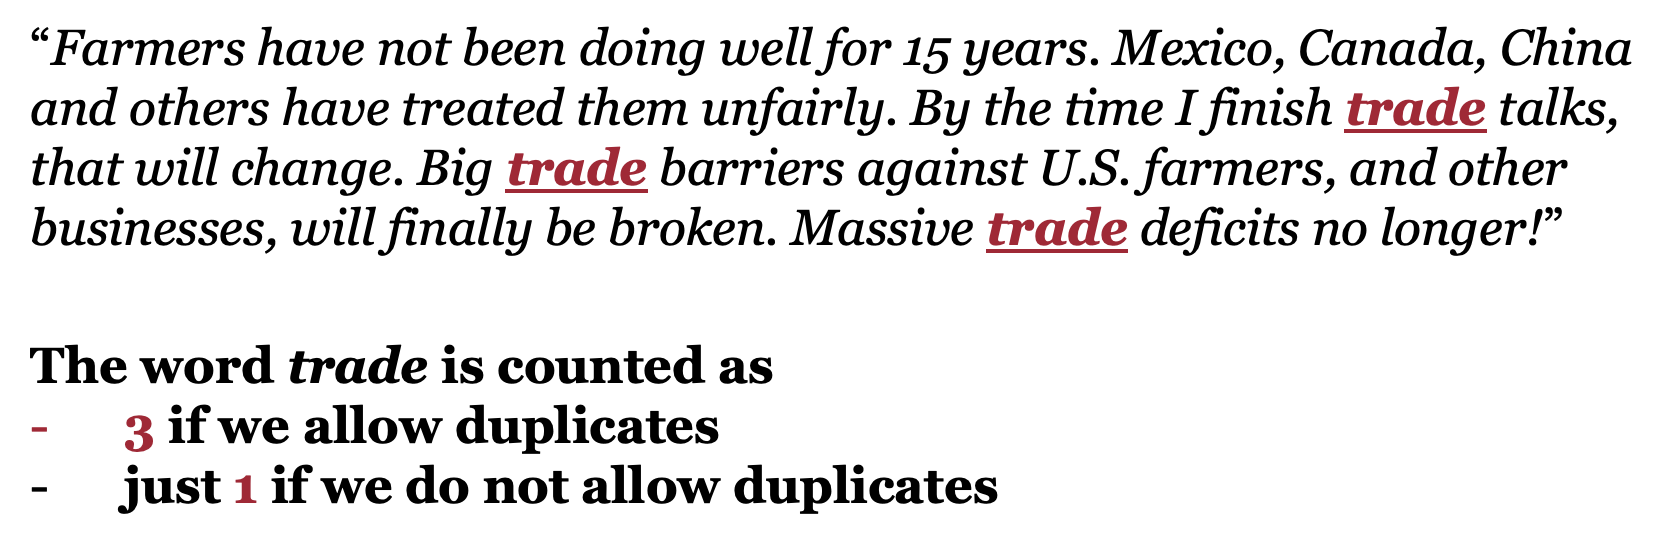

In [ ]:
from IPython.display import Image
Image(f"{classdata_folder}/images/word_count.png")

In [ ]:
counter.most_common(50)   # Show the top-n most popular words in counter

[('the', 727),
 ('’', 382),
 ('?', 350),
 ('to', 260),
 ('s', 226),
 ('in', 221),
 ('a', 206),
 ('is', 191),
 ('and', 190),
 ('.', 185),
 ('are', 178),
 ('for', 156),
 ('of', 149),
 ('how', 142),
 ('can', 141),
 ('you', 118),
 ('why', 114),
 ('what', 107),
 (',', 106),
 ('it', 101),
 ('we', 97),
 ('t', 95),
 ('on', 93),
 ('americans', 91),
 ('will', 87),
 ('this', 86),
 ('—', 85),
 ('that', 83),
 ('about', 83),
 ("'s", 79),
 ('democrats', 77),
 ('could', 69),
 ('be', 68),
 ('but', 65),
 ('do', 65),
 ('have', 59),
 ('abortion', 59),
 ('their', 58),
 ('win', 57),
 ('more', 51),
 ('republicans', 50),
 ('at', 49),
 ('election', 47),
 ('senate', 46),
 ('who', 45),
 ('an', 45),
 ('new', 43),
 ('2022', 42),
 ('…', 42),
 ('court', 42)]

collections.Counter.most_common: https://docs.python.org/3/library/collections.html#collections.Counter.most_common

Stopwords are words that are filtered out before processing of natural language text. Stopwords are generally the most common words in a language. There is no single universal list of stopwords used by all natural language processing tools, and indeed not all tools even use such a list. Some tools avoid removing stop words to support phrase search.

Stopwords on Wikipedia: https://en.wikipedia.org/wiki/Stop_words

In [ ]:
from nltk.corpus import stopwords

In [ ]:
global_stopwords = nltk.corpus.stopwords.words("english")
global_stopwords[:30]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself']

Stopwords, in fact, have no meaning in terms of keyword analysis.

In [ ]:
counter = Counter()

for l in df.tagged_words:
    word_set = set()

    for t in l:
        word = t[0].lower()

        if word not in global_stopwords:   # Check if the word is a stopword
            word_set.add(word)

    counter.update(word_set)

counter.most_common(30)

[('’', 382),
 ('?', 350),
 ('.', 185),
 (',', 106),
 ('americans', 91),
 ('—', 85),
 ("'s", 79),
 ('democrats', 77),
 ('could', 69),
 ('abortion', 59),
 ('win', 57),
 ('republicans', 50),
 ('election', 47),
 ('senate', 46),
 ('new', 43),
 ('2022', 42),
 ('…', 42),
 ('court', 42),
 ('supreme', 39),
 ('nfl', 38),
 ('trump', 37),
 ('week', 37),
 ("n't", 36),
 ('biden', 36),
 ('world', 35),
 ('republican', 34),
 ('voters', 34),
 ('might', 33),
 ('looking', 33),
 ('change', 33)]

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
local_stopwords = [c for c in string.punctuation] +\
                  ['‘', '’', '—', '…', "'s", "n't"] # 결과보고 없애고 싶은거 추가하기
local_stopwords

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 '‘',
 '’',
 '—',
 '…',
 "'s",
 "n't"]

Note that the words *health*, *mental*, and *mentalhealth* were included in the local stopwords, as they are search terms so every tweet must have any of those words, which makes them not so meaningful in terms of keyword analysis.

In [ ]:
counter = Counter()

for l in df.tagged_words:
    word_set = set()

    for t in l:
        word = t[0].lower()

        if word not in (global_stopwords + local_stopwords):
        # Check if the word is either a global or a local stopword
            word_set.add(word)

    counter.update(word_set)

counter.most_common(30)

[('americans', 91),
 ('democrats', 77),
 ('could', 69),
 ('abortion', 59),
 ('win', 57),
 ('republicans', 50),
 ('election', 47),
 ('senate', 46),
 ('new', 43),
 ('2022', 42),
 ('court', 42),
 ('supreme', 39),
 ('nfl', 38),
 ('trump', 37),
 ('week', 37),
 ('biden', 36),
 ('world', 35),
 ('republican', 34),
 ('voters', 34),
 ('might', 33),
 ('looking', 33),
 ('change', 33),
 ('midterms', 32),
 ('nba', 31),
 ('college', 30),
 ('watch', 30),
 ('georgia', 30),
 ('year', 29),
 ('teams', 28),
 ('want', 28)]

In [ ]:
counter["trump"]

37

The word '*trump*' appears 37 times in the corpus.

In [ ]:
[(word, count) for word, count in counter.items() if count > 50]

[('could', 69),
 ('win', 57),
 ('americans', 91),
 ('democrats', 77),
 ('abortion', 59)]

### Popular Nouns - topic 분석

In [ ]:
counter1 = Counter()

for l in df.tagged_words:
    word_set = set()

    for t in l:
        word = t[0].lower()
        tag = t[1]

        if tag.startswith("NN") & (word not in (global_stopwords + local_stopwords)):
            word_set.add(word)

    counter1.update(word_set)

counter1.most_common(30)

[('americans', 91),
 ('democrats', 75),
 ('could', 59),
 ('abortion', 59),
 ('republicans', 50),
 ('election', 47),
 ('senate', 46),
 ('new', 43),
 ('court', 42),
 ('supreme', 39),
 ('nfl', 38),
 ('biden', 36),
 ('win', 35),
 ('trump', 35),
 ('world', 35),
 ('week', 35),
 ('voters', 34),
 ('midterms', 32),
 ('might', 31),
 ('college', 30),
 ('georgia', 30),
 ('year', 29),
 ('nba', 29),
 ('teams', 28),
 ('datasets', 28),
 ('change', 28),
 ('politics', 27),
 ('house', 26),
 ('football', 25),
 ('republican', 23)]

### Popular Adjectives - emotional

In [ ]:
counter2 = Counter()

for l in df.tagged_words:
    word_set = set()

    for t in l:
        word = t[0].lower()
        tag = t[1]

        if tag.startswith("JJ") & (word not in (global_stopwords + local_stopwords)):
            word_set.add(word)

    counter2.update(word_set)

counter2.most_common(30)

[('last', 15),
 ('many', 14),
 ('republican', 11),
 ('democratic', 10),
 ('political', 9),
 ('much', 9),
 ('american', 8),
 ('best', 6),
 ('good', 6),
 ('final', 5),
 ('early', 5),
 ('important', 4),
 ('2022-23', 4),
 ('conservative', 4),
 ('special', 4),
 ('real', 4),
 ('big', 3),
 ('concerned', 3),
 ('unlikely', 3),
 ('likely', 3),
 ('ready', 3),
 ('week', 3),
 ('congressional', 3),
 ('unpopular', 3),
 ('next', 3),
 ('wrong', 2),
 ('clear', 2),
 ('asian', 2),
 ('toss-up', 2),
 ('fewer', 2)]

### Popular Verbs - behavior

In [ ]:
counter3 = Counter()

for l in df.tagged_words:
    word_set = set()

    for t in l:
        word = t[0].lower()
        tag = t[1]

        if tag.startswith("VB") & (word not in (global_stopwords + local_stopwords)):
            word_set.add(word)

    counter3.update(word_set)

counter3.most_common(30)

[('looking', 31),
 ('watch', 27),
 ('buy', 24),
 ("'re", 23),
 ('win', 22),
 ('want', 21),
 ('think', 19),
 ('need', 18),
 ('know', 12),
 ('make', 11),
 ('get', 11),
 ('going', 10),
 ('keep', 9),
 ('hiring', 9),
 ('made', 8),
 ('turned', 8),
 ('winning', 8),
 ('making', 7),
 ('take', 7),
 ('playing', 7),
 ('believe', 7),
 ('feel', 6),
 ('expect', 6),
 ('thinking', 5),
 ('left', 5),
 ('lose', 5),
 ('lost', 5),
 ('change', 5),
 ('voted', 5),
 ('favored', 5)]

## Putting Everything Together into a Single Function

In [ ]:
def get_counter(dataframe, stopwords=[], target_tag=None):
    counter = Counter()

    for l in dataframe.tagged_words:
        word_set = set()

        for t in l:
            word = t[0].lower()
            tag = t[1]

            ##########################################################
            # Check if the word is a stopword.
            ##########################################################
            if word in stopwords:
                continue

            if target_tag is None:
                word_set.add(word)
            else:
                ##########################################################
                # Check the tag
                ##########################################################
                if tag.startswith(target_tag):
                    word_set.add(word)
                else:
                    continue

        counter.update(word_set)     # Be aware of the indentation!

    return counter

In [ ]:
counter_all = get_counter(df, global_stopwords+local_stopwords)
counter_all.most_common(30)

[('americans', 91),
 ('democrats', 77),
 ('could', 69),
 ('abortion', 59),
 ('win', 57),
 ('republicans', 50),
 ('election', 47),
 ('senate', 46),
 ('new', 43),
 ('2022', 42),
 ('court', 42),
 ('supreme', 39),
 ('nfl', 38),
 ('trump', 37),
 ('week', 37),
 ('biden', 36),
 ('world', 35),
 ('republican', 34),
 ('voters', 34),
 ('might', 33),
 ('looking', 33),
 ('change', 33),
 ('midterms', 32),
 ('nba', 31),
 ('college', 30),
 ('watch', 30),
 ('georgia', 30),
 ('year', 29),
 ('teams', 28),
 ('want', 28)]

In [ ]:
counter_adj = get_counter(df, global_stopwords+local_stopwords, "JJ")
counter_adj.most_common(30)

[('last', 15),
 ('many', 14),
 ('republican', 11),
 ('democratic', 10),
 ('political', 9),
 ('much', 9),
 ('american', 8),
 ('best', 6),
 ('good', 6),
 ('final', 5),
 ('early', 5),
 ('important', 4),
 ('2022-23', 4),
 ('conservative', 4),
 ('special', 4),
 ('real', 4),
 ('big', 3),
 ('concerned', 3),
 ('unlikely', 3),
 ('likely', 3),
 ('ready', 3),
 ('week', 3),
 ('congressional', 3),
 ('unpopular', 3),
 ('next', 3),
 ('wrong', 2),
 ('clear', 2),
 ('asian', 2),
 ('toss-up', 2),
 ('fewer', 2)]

## Create Time Series Data

In [ ]:
count = pd.Series(data=1, index=df.datetime).resample(rule="w").count() # 1/15 : 1/9 ~ 1/15
count

datetime
2021-10-03    10
2021-10-10    21
2021-10-17    18
2021-10-24    19
2021-10-31    21
              ..
2022-12-18    19
2022-12-25    17
2023-01-01     6
2023-01-08    12
2023-01-15     5
Freq: W-SUN, Length: 68, dtype: int64

The `rule` argument value takes
- "h": hourly
- "d": daily
- "w": weekly
- "m": monthly
- "y": yearly

In [ ]:
count.max(), count.idxmax() # 이때 왜 article이 많았는지 분석

(33, Timestamp('2022-10-30 00:00:00', freq='W-SUN'))

In [ ]:
count.min(), count.idxmin()

(3, Timestamp('2022-11-27 00:00:00', freq='W-SUN'))

In [ ]:
df[(df.datetime >= "2022-10-24") & (df.datetime < "2022-10-31")]

,file_name,title,author,datetime,body,words,tagged_words
188,overturning-roe-has-meant-at-least-10000-fewer-legal-abortions.html,"Overturning Roe Has Meant At Least 10,000 Fewer Legal Abortions",Maggie Koerth,2022-10-30 09:00:00,"Abortion Overturning Roe Has Meant At Least 10,000 Fewer Legal Abortions The Hope Clinic for Women in southern Illinois has...","[Overturning, Roe, Has, Meant, At, Least, 10,000, Fewer, Legal, Abortions]","[(Overturning, VBG), (Roe, NNP), (Has, NNP), (Meant, NNP), (At, IN), (Least, NNP), (10,000, CD), (Fewer, NNP), (Legal, NNP), (Abortions, NNP)]"
189,what-does-the-midterm-model-say-with-two-weeks-left.html,What Does The Midterm Model Say With Two Weeks Left?,NaN,2022-10-29 00:00:00,"In this live taping of the FiveThirtyEight Politics podcast in Washington, D.C., Nate and Galen break down the current FiveThirtyEight midterm fo...","[What, Does, The, Midterm, Model, Say, With, Two, Weeks, Left, ?]","[(What, WP), (Does, VBZ), (The, DT), (Midterm, NNP), (Model, NNP), (Say, NNP), (With, IN), (Two, CD), (Weeks, NNS), (Left, VBN), (?, .)]"
190,could-a-republican-really-win-the-oregon-governors-race.html,Could A Republican Really Win The Oregon Governor’s Race?,Emily Venezky,2022-10-28 00:00:00,"Will Oregon elect its first Republican governor in 40 years? According to FiveThirtyEight’s forecast, the race is a dead heat between Republican ...","[Could, A, Republican, Really, Win, The, Oregon, Governor, ’, s, Race, ?]","[(Could, MD), (A, VB), (Republican, NNP), (Really, NNP), (Win, NNP), (The, DT), (Oregon, NNP), (Governor, NNP), (’, NNP), (s, VBD), (Race, NNP), (..."
191,candidates-are-sitting-out-debates-will-voters-care.html,Candidates Are Sitting Out Debates. Will Voters Care?,Galen Druke,2022-10-28 00:00:00,"In competitive races throughout the country, candidates are refusing to debate — and in this cycle, the number of races without debates is higher...","[Candidates, Are, Sitting, Out, Debates, ., Will, Voters, Care, ?]","[(Candidates, NNS), (Are, VBP), (Sitting, VBG), (Out, RP), (Debates, NNP), (., .), (Will, NNP), (Voters, NNP), (Care, NNP), (?, .)]"
192,dallas-mavericks-early-season-chemistry.html,The Dallas Mavericks Are Different From Last Year. That Doesn’t Mean Worse.,Dorothy J. Gentry,2022-10-28 13:25:00,"NBA The Dallas Mavericks Are Different From Last Year. That Doesn’t Mean Worse. Despite criticisms of the team's offseason moves, the Mavs ma...","[The, Dallas, Mavericks, Are, Different, From, Last, Year, ., That, Doesn, ’, t, Mean, Worse, .]","[(The, DT), (Dallas, NNP), (Mavericks, NNP), (Are, NNP), (Different, NNP), (From, IN), (Last, JJ), (Year, NN), (., .), (That, IN), (Doesn, NNP), (..."
193,where-our-model-thinks-the-polls-might-be-biased.html,Where Our Model Thinks The Polls Might Be Biased,Nate Silver,2022-10-28 09:52:00,"2022 Election Where Our Model Thinks The Polls Might Be Biased By Nate Silver Oct. 28, 2022, at 9:52 AM ...","[Where, Our, Model, Thinks, The, Polls, Might, Be, Biased]","[(Where, WRB), (Our, PRP$), (Model, NNP), (Thinks, VBZ), (The, DT), (Polls, NNS), (Might, NNP), (Be, NNP), (Biased, VBN)]"
194,can-you-hand-out-all-the-candy.html,Can You Hand Out All The Candy?,Zach Wissner-Gross,2022-10-28 08:00:00,"The Riddler Can You Hand Out All The Candy? By Zach Wissner-Gross Oct. 28, 2022, at 8:00 AM Illustrat...","[Can, You, Hand, Out, All, The, Candy, ?]","[(Can, MD), (You, PRP), (Hand, VB), (Out, RP), (All, PDT), (The, DT), (Candy, NNP), (?, .)]"
195,how-liv-golf-is-tearing-the-sport-apart-in-3-charts.html,"How LIV Golf Is Tearing The Sport Apart, In 3 Charts",Alex Newman,2022-10-28 06:00:00,"Golf How LIV Golf Is Tearing The Sport Apart, In 3 Charts By Alex Newman and Neil Paine Oct. 28, 2022, at 6:00 AM ...","[How, LIV, Golf, Is, Tearing, The, Sport, Apart, ,, In, 3, Charts]","[(How, WRB), (LIV, NNP), (Golf, NNP), (Is, VBZ), (Tearing, VBG), (The, DT), (Sport, NNP), (Apart, NNP), (,, ,), (In, IN), (3, CD), (Charts, NNS)]"
196,the-supreme-court-could-overturn-another-major-

In [ ]:
len(df[(df.datetime >= "2022-10-24") & (df.datetime < "2022-10-31")]) # 미대선 중간 선거날

33

In [ ]:
counter = get_counter(df[(df.datetime >= "2022-10-24") & (df.datetime < "2022-10-31")], global_stopwords+local_stopwords)
counter.most_common(30)

[('could', 4),
 ('voters', 4),
 ('polls', 4),
 ('fewer', 3),
 ('really', 3),
 ('win', 3),
 ('phillies', 3),
 ('astros', 3),
 ('american', 3),
 ('college', 3),
 ('model', 2),
 ('midterm', 2),
 ('republican', 2),
 ('candidates', 2),
 ('might', 2),
 ('point', 2),
 ('turning', 2),
 ('think', 2),
 ('much', 2),
 ('education', 2),
 ("'re", 2),
 ('series', 2),
 ('world', 2),
 ('meant', 1),
 ('roe', 1),
 ('10,000', 1),
 ('least', 1),
 ('legal', 1),
 ('abortions', 1),
 ('overturning', 1)]

## Word Clouds

In [ ]:
! pip install --user wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from wordcloud import WordCloud

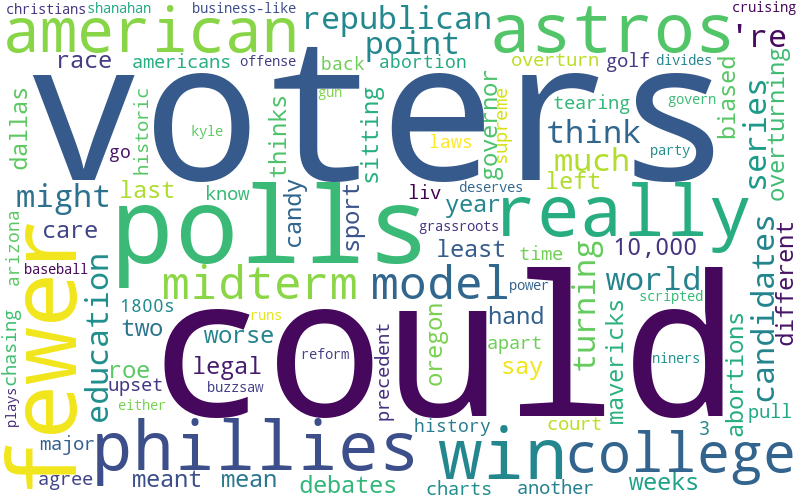

In [ ]:
wc = WordCloud(background_color="white", max_words=100, width=800, height=500)
wc.generate_from_frequencies(counter)
wc.to_file(f"{outcome_folder}/wordcloud.png")
Image(filename=f"{outcome_folder}/wordcloud.png")